# Exploratory Data Analysis for METR-LA, PEMS-BAY and Incheon

## Loading Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd

In [2]:
df_la = pd.read_hdf("../datasets/METRLA/metr-la.h5")
df_la.head().reset_index().iloc[:, :9]

,index,773869,767541,767542,717447,717446,717445,773062,767620
0,2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125
1,2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000
2,2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250
3,2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000
4,2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000


In [3]:
df_pems = pd.read_hdf("../datasets/PEMSBAY/pems-bay.h5")
df_pems.head().reset_index().iloc[:, :9]

sensor_id,index,400001,400017,400030,400040,400045,400052,400057,400059
0,2017-01-01 00:00:00,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0
1,2017-01-01 00:05:00,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8
2,2017-01-01 00:10:00,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8
3,2017-01-01 00:15:00,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7
4,2017-01-01 00:20:00,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7


In [4]:
df_imc = pd.read_hdf("../datasets/metr-imc/metr-imc.h5")
df_imc.head().reset_index().iloc[:, :9]

,index,1680254606,1650051800,1670030907,1610002406,1650374201,1650038700,1690052500,1650054600
0,2023-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,2023-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN
2,2023-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN
3,2023-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN
4,2023-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN


In [5]:
print("Is time series index:", isinstance(df_imc.index, pd.DatetimeIndex))
df_imc_time_diff = df_imc.index.to_series().diff().dropna()
print("Is data hourly:", (df_imc_time_diff == pd.Timedelta(hours=1)).all())

Is time series index: True
Is data hourly: False


In [6]:
# 인덱스를 시간 차이로 확인
time_diffs = df_imc.index.to_series().diff()

# 1시간 간격이 아닌 부분 찾기
gaps = time_diffs[time_diffs != pd.Timedelta(hours=1)]

# 결과 출력
if gaps.empty:
    print("인덱스는 1시간 간격으로 되어 있습니다.")
else:
    print("인덱스가 1시간 간격이 아닌 부분:")
    for idx in gaps.index:
        print(f"시작 지점: {df_imc.index[df_imc.index.get_loc(idx) - 1]}, 끝 지점: {idx}")

인덱스가 1시간 간격이 아닌 부분:
시작 지점: 2023-12-06 23:00:00, 끝 지점: 2023-01-01 00:00:00
시작 지점: 2023-11-23 23:00:00, 끝 지점: 2023-11-25 00:00:00
시작 지점: 2023-11-25 23:00:00, 끝 지점: 2023-12-07 00:00:00
시작 지점: 2023-12-31 23:00:00, 끝 지점: 2023-11-24 00:00:00
시작 지점: 2023-11-24 23:00:00, 끝 지점: 2023-11-26 00:00:00


In [7]:
df_imc_sorted = df_imc.sort_index()

# 인덱스를 시간 차이로 확인
time_diffs = df_imc_sorted.index.to_series().diff()

# 1시간 간격이 아닌 부분 찾기
gaps = time_diffs[time_diffs != pd.Timedelta(hours=1)]

# 결과 출력
if gaps.empty:
    print("인덱스는 1시간 간격으로 되어 있습니다.")
else:
    print("인덱스가 1시간 간격이 아닌 부분:")
    for idx in gaps.index:
        print(f"시작 지점: {df_imc_sorted.index[df_imc_sorted.index.get_loc(idx) - 1]}, 끝 지점: {idx}")

인덱스가 1시간 간격이 아닌 부분:
시작 지점: 2023-12-31 23:00:00, 끝 지점: 2023-01-01 00:00:00


### Column and Data info

In [8]:
print("-- METR-LA\n", f"dtype: {df_la.dtypes.unique().tolist()}", f"length: {len(df_la.columns)}", end="\n\n")
print("-- PEMS-BAY\n", f"dtype: {df_pems.dtypes.unique().tolist()}", f"length: {len(df_pems.columns)}", end="\n\n")
print("-- Incheon\n", f"dtype: {df_la.dtypes.unique().tolist()}", f"length: {len(df_imc.columns)}")

-- METR-LA
 dtype: [dtype('float64')] length: 207

-- PEMS-BAY
 dtype: [dtype('float64')] length: 325

-- Incheon
 dtype: [dtype('float64')] length: 2113


### Index info

In [9]:
print("-- METR-LA\n", f"dtype: {df_la.index.dtype}", f"length: {len(df_la.index)}", end="\n\n")
print("-- PEMS-BAY\n", f"dtype: {df_pems.index.dtype}", f"length: {len(df_pems.index)}", end="\n\n")
print("-- Incheon\n", f"dtype: {df_imc.index.dtype}", f"length: {len(df_imc.index)}")

-- METR-LA
 dtype: datetime64[ns] length: 34272

-- PEMS-BAY
 dtype: datetime64[ns] length: 52116

-- Incheon
 dtype: datetime64[ns] length: 8760


### Missing Data (결측값)

In [10]:
print("-- METR-LA")
print(f"   No Missing: {len(df_la.columns[df_la.isnull().sum() == 0])}")
print(f"   <=100: {len(df_la.columns[df_la.isnull().sum() <= 100])}")
print(f"   >100: {len(df_la.columns[df_la.isnull().sum() > 100])}", end="\n\n")

print("-- PEMS-BAY")
print(f"   No Missing: {len(df_pems.columns[df_pems.isnull().sum() == 0])}")
print(f"   <=100: {len(df_pems.columns[df_pems.isnull().sum() <= 100])}")
print(f"   >100: {len(df_pems.columns[df_pems.isnull().sum() > 100])}", end="\n\n")

print("-- Incheon")
print(f"   No Missing: {len(df_imc.columns[df_imc.isnull().sum() == 0])}")
print(f"   <=100: {len(df_imc.columns[df_imc.isnull().sum() <= 100])}")
print(f"   >100: {len(df_imc.columns[df_imc.isnull().sum() > 100])}")
print(f"   <500: {len(df_imc.columns[df_imc.isnull().sum() < 500])}")
print(f"   <750: {len(df_imc.columns[df_imc.isnull().sum() < 750])}")

-- METR-LA
   No Missing: 207
   <=100: 207
   >100: 0

-- PEMS-BAY
   No Missing: 325
   <=100: 325
   >100: 0

-- Incheon
   No Missing: 65
   <=100: 111
   >100: 2002
   <500: 296
   <750: 423


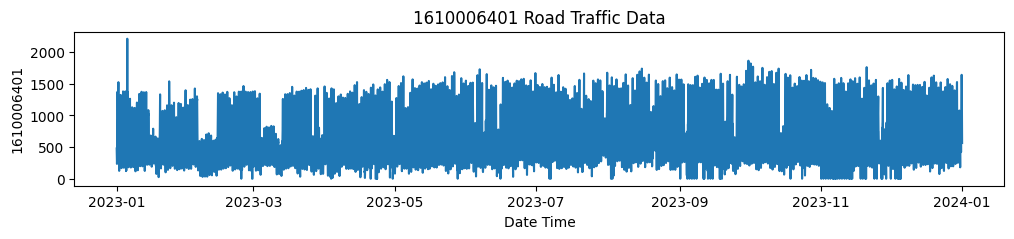

In [11]:
sample_traffic_data = df_imc[df_imc.columns[df_imc.isnull().sum() == 0][0]]

plt.figure(figsize=(12, 2))
sns.lineplot(sample_traffic_data)
plt.title(f"{sample_traffic_data.name} Road Traffic Data")
plt.xlabel("Date Time")
plt.show()

최종적으로는 결측값을 포함한 전체 데이터셋을 기반으로 모델을 생성하고 성능을 평가해야 하지만 결측값 문제는 현재 집중하고 있는 연구 방향과는 독립적인 문제로 판단된다. 또한, 모든 데이터를 포함하면 데이터의 크기가 커져 학습 시간이 길어지는 문제도 있다. 따라서 현재는 데이터를 줄여 효율성을 높이고자 먼저 결측값이 없는 데이터를 사용하여 모델을 생성하고, 이 모델이 유효한지 판단한 후, 결측값 문제를 추가로 해결하는 방향으로 연구를 진행하고자 한다.

In [12]:
from songdo_traffic_core.dataset.gis.view_layer.metr import SensorView

no_missing_columns = df_imc.columns[df_imc.isnull().sum() == 0].to_list()
less_500_missing_columns = df_imc.columns[df_imc.isnull().sum() < 500].to_list()
less_750_missing_columns = df_imc.columns[df_imc.isnull().sum() < 750].to_list()

In [13]:
view = SensorView("../datasets/metr-imc/graph_sensor_locations.csv")
view.set_filter(no_missing_columns)
view.export_to_file("../datasets/metr-imc/miscellaneous", "no_missing.shp")
view.set_filter(less_500_missing_columns)
view.export_to_file("../datasets/metr-imc/miscellaneous", "missing_500.shp")
view.set_filter(less_750_missing_columns)
view.export_to_file("../datasets/metr-imc/miscellaneous", "missing_750.shp")

2024/07/02 17:27:05 pyogrio._io [INFO] Created 65 records
2024/07/02 17:27:05 pyogrio._io [INFO] Created 296 records
2024/07/02 17:27:05 pyogrio._io [INFO] Created 423 records


결측치가 없는 데이터를 사용하는 것이 가장 이상적이지만, 이 경우 노드의 수가 너무 줄어들어 공간 정보가 모델에 충분히 반영되지 않을 가능성이 있다. 따라서, 기존에 많이 사용하는 METR-LA, PEMS-BAY 등의 데이터셋 크기와 유사한 수준으로 조정하였다. 결측치 허용 기준을 여러 개 비교한 결과, 500 정도가 기존 데이터셋과 유사한 크기를 유지하면서도 공간 정보를 적절히 반영할 수 있을 것으로 예상되었다.

- 결측치가 하나도 없는 센서 노드
![Missing_0](../docs/Missing_0.png)

- 결측치 500개 미만의 센서 노드
![Missing_500](../docs/Missing_500.png)

- 결측치 750개 미미나의 센서 노드
![Missing_750](../docs/Missing_750.png)

이에 따라 500개 미만의 결측치를 가진 센서 노드만 별도로 추출하여 데이터셋을 다시 생성하였다.

In [14]:
from songdo_traffic_core.dataset.metr_imc.generator import MetrImcSubsetGenerator

generator = MetrImcSubsetGenerator(
    nodelink_dir="../datasets/metr-imc/nodelink",
    imcrts_dir="../datasets/metr-imc/imcrts",
    metr_imc_dir="../datasets/metr-imc/",
)

2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] metr-imc.h5 already exists
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] metr_ids.txt already exists
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] graph_sensor_locations.csv already exists
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] distances_imc_2024.csv already exists
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] adj_mx.pkl already exists
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] Start generating subset...
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] Generating ../datasets/metr-imc-296/metr-imc.h5...
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.generator [INFO] Generating ../datasets/metr-imc-296/metr_ids.txt...
2024/07/02 17:27:06 songdo_traffic_core.dataset.metr_imc.converter.metr_ids [INFO] Saving METR-IMC IDs to ../datasets